188
(1, 186, 1)
325
325
1/1 [==============================] - 3s 3s/step
[1]
ECG Sample 1: Detected Arrhythmia - Supraventricular ectopic beats
Detected Arrhythmia Percentages:
Supraventricular ectopic beats: 100.00%


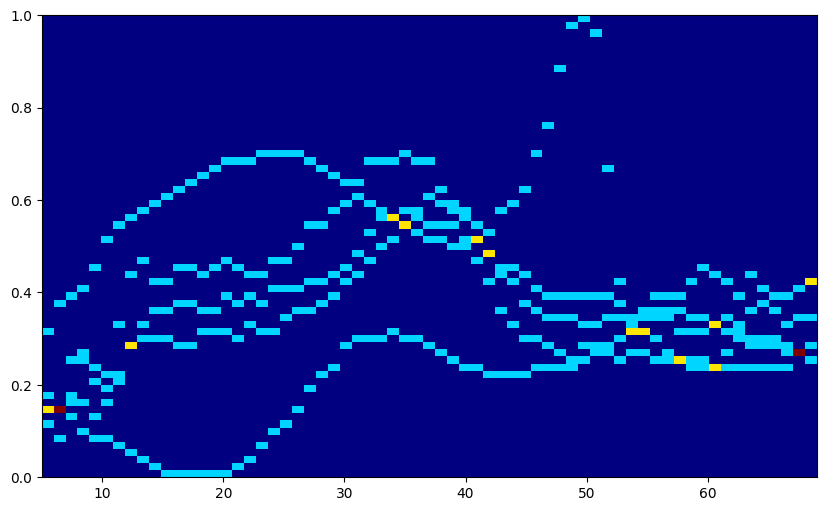

In [1]:
from customtkinter import *
from PIL import *
from tkinter import filedialog
from os import *
import time
import numpy as np
import pandas as pd
from keras.models import load_model
from collections import Counter
import matplotlib.pyplot as plt

set_appearance_mode("light")
# Load the trained model
model = load_model('best_model.h5')

back="#C4EEF2"

window=CTk()
window.geometry("900x600+200+50")
window.resizable(0,0)
window.title("ECG Scanner")
window.configure(fg_color=back)
frame=CTkFrame(window,width=1000,height=1000)
frame.configure(fg_color="white")
frame.place(x=452,y=72)

CTkLabel(window,text="ECG Arrhythmia Detector",font=("Imprint MT Shadow",35,"normal"),fg_color="#025159",height=70,width=900,text_color="#F2F2F2").place(x=0,y=0)
icon=CTkImage(Image.open("heaart.png"),size=(55,55))
CTkLabel(window,text="",image=icon,fg_color="#025159").place(x=120,y=12)
CTkLabel(window,text=" ",width=5,height=4000,font=("Arial",1),wraplength=1,fg_color="black").place(x=450,y=70)
CTkLabel(window,text="",width=900,height=4,font=("Arial",1),wraplength=0,fg_color="black").place(x=0,y=70)
CTkLabel(window,text="",width=900,height=4,font=("Arial",1),wraplength=0,fg_color="black").place(x=0,y=0)

label=CTkLabel(window,text="Please choose a CSV file and specify a row number to assess \nfor arrhythmia detection",justify="left",font=("Times New Roman",17))
label.place(x=5,y=250)



def calculate(f):
    x1 = pd.read_csv(f, header=None)
    x1[0] = x1[0].astype(int)
    print(x1.shape[1])
    c=x1
    #print(c)
    #c = x1.groupby(0, group_keys=False).apply(lambda group_df: group_df.iloc[0])
    X_new = c.iloc[row:row+1,0:186].values
    X_new1=X_new
    nu.destroy()
    fig=plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.plot(X_new1[0],color="red")  # Plot the first sample from X_new1
    plt.title('Time Series Plot for Channel 1')
    plt.xlabel('Time')
    plt.ylabel('Value')
    fig.savefig('ecg_graph.png')
    ecg=CTkImage(Image.open("ecg_graph.png"),size=(450,253))
    CTkLabel(window,text="",image=ecg,fg_color="#C4EEF2").place(x=454,y=73)
    for i in range (2):
        time.sleep(2)
        window.update_idletasks()
    
    l3=CTkLabel(window,text="Creating histogram...",font=("Times New Roman",17))
    l3.place(x=60,y=140)
    for i in range (2):
        time.sleep(2)
        window.update_idletasks()
    
    def add_gaussian_noise(signal, target_length=186):
        current_length = len(signal)
        noise_length = target_length - current_length
        if noise_length > 0:
            noise = np.random.normal(0, 0.5, noise_length)
            return np.concatenate((signal, noise), axis=0)
        elif noise_length<0:
            return signal[:target_length]
        else:
            return signal
    
    # Create a list to store the noisy signals
    noisy_signals = []
    
    for i in range(X_new.shape[0]):  # Loop over rows in X_new
        noisy_signal = add_gaussian_noise(X_new[i], target_length=186)
        noisy_signals.append(noisy_signal)
    
    # Convert the list of noisy signals to a NumPy array
    X_new = np.array(noisy_signals)
    
    # Reshape all signals to (186, 1)
    X_new = X_new.reshape(X_new.shape[0], 186, 1)
    
    print(X_new.shape)
    
    def plot_hist(class_number,size,min_,bins):
        plt.clf()
        img=c.loc[c[140]==class_number].values
        img=img[:,min_:size]
        img_flatten=img.flatten()
        
        final1=np.arange(min_,size)
        for i in range (img.shape[0]-1):
            tempo1=np.arange(min_,size)
            final1=np.concatenate((final1, tempo1), axis=None)
        print(len(final1))
        print(len(img_flatten))
        plt.hist2d(final1,img_flatten, bins=(bins,bins),cmap=plt.cm.jet)
        plt.savefig("histogram.png")
        ecghist=CTkImage(Image.open("histogram.png"),size=(450,253))
        CTkLabel(window,text="",image=ecghist,fg_color="#C4EEF2").place(x=454,y=330)
    
    for i in range (3):
        time.sleep(0.2)
        window.update_idletasks()
        if(i==2):
            plot_hist(0,70,5,65)
    l3.configure(text="")
    
    # Make predictions using the loaded model
    predictions = model.predict(X_new)
    
    # Post-process predictions to obtain class labels
    predicted_labels = np.argmax(predictions, axis=1)
    
    # Create a mapping between class indices and arrhythmia types
    class_mapping = {
        0: 'Normal',
        1: 'Supraventricular ectopic beats',
        2: 'Ventricular ectopic beats',
        3: 'Fusion Beats',
        4: 'Unknown Beats',
    }
    
    l3=CTkLabel(window,text="Displaying Results...",font=("Times New Roman",17))
    l3.place(x=60,y=140)
    for i in range (2):
        time.sleep(2)
        window.update_idletasks()
        
    l3.configure(text="Results:")
    print(predicted_labels)
    
    # Interpret and report the results
    for i, label_idx in enumerate(predicted_labels):
        arrhythmia_type = class_mapping[label_idx]
        print(f"ECG Sample {i + 1}: Detected Arrhythmia - {arrhythmia_type}")
        l3.configure(text="")
        l4=CTkLabel(window,text=f"Detected Beat type - \n{arrhythmia_type}",font=("Times New Roman",22),justify="left")
        l4.place(x=60,y=140)
        b0="Normal beats, also known as sinus rhythm, are the standard \nand regular heartbeats. They originate from the heart's \nnatural pacemaker, the sinoatrial (SA) node, and follow a \nconsistent pattern. These beats maintain the optimal rhythm \nof the heart, ensuring efficient blood circulation"
        b1="Supraventricular ectopic beats are abnormal heartbeats that \narise above the ventricles but outside the normal pathway \nof the SA node. These beats can be premature, irregular, \nor extra beats, often resulting from electrical disturbances in \nthe atria. They may disrupt the heart's regular rhythm."
        b2="Ventricular ectopic beats are abnormal heartbeats originating \nfrom the ventricles, the lower chambers of the heart. These \nbeats are usually premature and can be caused by various \nfactors, such as heart disease or stress. Ventricular ectopic \nbeats may feel like a skipped or extra beat and can potentially \nlead to more severe arrhythmias."
        b3="Fusion beats are a unique type of heart rhythm irregularity that \noccurs when a normal beat and a premature beat from another \nsource coincide or 'fuse' together on the electrocardiogram(ECG). \nThese beats are challenging to differentiate from other types of \nbeats and often appear as a combination of normal and \nabnormal characteristics."
        b4="Unknown beats refer to heart rhythms that are difficult to \nclassify or identify. These beats may not fit into the typical \ncategories of normal, supraventricular, or ventricular beats. \nAccurate diagnosis and treatment of unknown beats can be \nchallenging and may require further investigation or specialized \ntesting to determine their origin and significance."
        b_list=[b0,b1,b2,b3,b4]
        l5=CTkLabel(window,text=b_list[label_idx],font=("Times New Roman",15),justify="left")
        l5.place(x=58,y=200)
        b11="These are arrhythmias that originate in the atria (upper chambers \nof the heart), such as atrial fibrillation, atrial flutter, or \nsupraventricular tachycardia."
        b21="These are arrhythmias that originate in the ventricles (lower \nchambers of the heart), such as premature ventricular contractions \n(PVCs) or ventricular tachycardia0."
        b12_list=[b11,b21]
        if(label_idx==1 or label_idx==2):
            
            lab=CTkLabel(window,text="Arrhythmia detected!!!",font=("Times New Roman",20),text_color="red")
            lab1=CTkLabel(window,text=b12_list[label_idx-1], font=("Times New Roman",15),text_color="black",justify="left")
            lab1.place(x=55,y=400)
            lab.place(x=55,y=350)
        
        
    arrhythmia_counts = Counter(predicted_labels)
    
    # Calculate the total number of detected arrhythmias
    total_detected = len(predicted_labels)
    
    # Calculate the percentages of each arrhythmia type
    arrhythmia_percentages = {class_mapping[label]: (count / total_detected) * 100 for label, count in arrhythmia_counts.items()}
    
    # Print the percentages
    print("Detected Arrhythmia Percentages:")
    for arrhythmia, percentage in arrhythmia_percentages.items():
        print(f"{arrhythmia}: {percentage:.2f}%")
    
    CTkLabel(window,text="              The accuracy of our Arrhythmia ECG scanner model is approximately 86.12%.\nThis means that when analyzing ECG (Electrocardiogram) data, the model correctly \nidentifies arrhythmia or irregular heart rhythms in 86.12% of cases. While this accuracy \nlevel is a strong indicator of the model's effectiveness, it's essential to consider that medical \ndiagnoses, including arrhythmia detection, may also rely on the judgment of healthcare \nprofessionals.",
         font=("Times New Roman",12),text_color="black",justify="left").place(x=10,y=465)

    CTkLabel(window,text="Note:",font=("Times New Roman",15,"bold"),height=0,width=0).place(x=10,y=462)
    
def select():
    if(nu.get()!=""):
        global row
        row=int(nu.get())
        f=filedialog.askopenfilename(filetypes=(("csv",".csv"),("All","*.*")),initialdir="C://Users//Toshiba/Desktop")
        if(f!=""):
            CTkLabel(window,text="",fg_color=back,width=445,height=500).place(x=5,y=90)
            label.destroy()
            c1.destroy()
            b1.destroy()
            nu.destroy()
            f=os.path.split(f)
            f=f[1]
            icon1=CTkImage(Image.open("csvimg.png"),size=(40,40))
            CTkLabel(window,text="",image=icon1,fg_color="#C4EEF2").place(x=20,y=100)
            l1=CTkLabel(window,text=f,font=("Times New Roman",17))
            l1.place(x=60,y=110)
            l2=CTkLabel(window,text="Analyzing data...",font=("Times New Roman",17))
            l2.place(x=60,y=140)
            for i in range (2):
                time.sleep(2)
                window.update_idletasks()
            l2.destroy()
            l3=CTkLabel(window,text="Plotting signals...",font=("Times New Roman",17))
            l3.place(x=60,y=140)
            for i in range (2):
                time.sleep(2)
                window.update_idletasks()
            l3.configure(text="")
            calculate(f)

c1=CTkLabel(window,text="Our ECG scanner model employs advanced machine learning algorithms \nand extensive training data to make these assessments. It is a valuable tool \nfor assisting medical professionals in the early detection of arrhythmia and \nthe provision of timely medical intervention.Please note that this accuracy \npercentage is based on our model's training and testing performance. For \nany specific medical concerns or decisions, we recommend consulting with\na qualified healthcare practitioner for a comprehensive evaluation and \ndiagnosis",
        font=("Times New Roman",15),justify="left")
c1.place(x=5,y=90)

nu=CTkEntry(window,placeholder_text="Enter row number")
nu.place(x=10,y=320)
b1=CTkButton(window,text="Select File",fg_color="#7AB8BF",text_color="black",font=("Times New Roman",20),command=select,corner_radius=30)
b1.place(x=10,y=380)


CTkLabel(window,text="",width=800,height=2,font=("Arial",1),wraplength=0,fg_color="black").place(x=450,y=325)

window.mainloop()

In [ ]:
#19000
